# Εργασία στο Μάθημα Αναγνώριση Προτύπων - Μέρη Α, Β, Γ
## Ονοματεπώνυμα Φοιτητών:

## Part A

## Part B

The purpose of this part is to train a K-NN classifier using the same training set as the previous part. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)
data = data.values 

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Part C

The purpose of the third part of the deliverable is to use an SVM classifier in order to classify the data from the datesetCTest.csv file.

To do so we firstly load the data from the csv file and separate it into train and test data in the same way as in the previous parts.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)
data = data.values 

#printing the data
print(data)

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

[[ 1.8036    4.4229    3.      ]
 [ 3.4615    4.1436    2.      ]
 [ 2.1873    3.9964    1.      ]
 [ 3.0933    2.9056    1.      ]
 [ 1.7586    2.4109    1.      ]
 [ 1.3935    3.3955    3.      ]
 [-0.25885  -0.30159   1.      ]
 [ 7.1342    4.0605    1.      ]
 [ 3.1281    3.4291    2.      ]
 [ 5.7726    0.95443   2.      ]
 [ 1.6966    2.3042    1.      ]
 [ 4.5855    6.8982    1.      ]
 [ 1.9932    3.8719    1.      ]
 [ 1.8076    1.4564    1.      ]
 [ 2.5472    5.1554    3.      ]
 [ 4.9085    3.5222    2.      ]
 [ 4.8933    3.7063    1.      ]
 [ 0.85293   0.56615   1.      ]
 [ 2.1049    2.9689    1.      ]
 [ 3.1312    3.5776    2.      ]
 [ 1.2831    3.6174    3.      ]
 [-0.64185   4.9521    3.      ]
 [ 6.1643    5.7793    1.      ]
 [ 0.79251   1.9034    1.      ]
 [ 5.131     3.2936    2.      ]
 [ 3.9074    4.0554    2.      ]
 [ 6.044     1.5146    2.      ]
 [ 5.9782    5.8386    1.      ]
 [ 4.8381    3.1233    2.      ]
 [ 0.92854   5.4136    3.      ]
 [ 1.561  

We then import the 'scikit-learn' library that contains the SVM linear classifier and the 'time' library in order to be able to calculate the time our classifier needs to train the model and make predictions on the data and fit out data into our classifier.

In [3]:
from sklearn import svm

linear_classifier = svm.SVC(kernel= 'linear')
linear_classifier.fit(X_train, y_train)

SVC(kernel='linear')

We instruct the classifier to generate predictions, measuring the average error on the training data.

In [6]:
from sklearn.metrics import accuracy_score

x_train_prediction = linear_classifier.predict(X_train)

# Calculate classification errors for each data point
classification_errors = (x_train_prediction != y_train).astype(int)

# Calculate the average error
average_error = classification_errors.mean()
print(f'The average error on the training set is: {average_error}')

The average error on the training set is: 0.19285714285714287


In the same way we calculate the error of the classifier in the testing data.

In [9]:
x_test_prediction = linear_classifier.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, x_test_prediction)

# Calculate classification errors for each data point
classification_errors = (x_test_prediction != y_test).astype(int)

# Calculate the average error
average_error = classification_errors.mean()
print(f'The average error on the testing data set is: {average_error}')


The average error on the testing data set is: 0.21428571428571427


We define the function to represent our data in 2D format, where the shape defines the class to which each line belongs. In addition, we depict all 3 regions resulting from the classifier with the lines separating the classes from each other.

In [10]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

def plot_func(x, y, clf ):
   
    plt.style.use('_mpl-gallery')
   
    fig, ax = plt.subplots(figsize=(8, 6)) 

    # Ploting the decision boundaries and margins with a specific figure size
    plot_decision_regions(x, y.astype(np.int_), clf, legend=2, ax=ax)

    # Add labels and legend
    ax.set_xlabel('X-axis label')
    ax.set_ylabel('Y-axis label')
    ax.legend()

    # Show the plot
    plt.show()

We call the plot_func function on our training data and plot our graph.

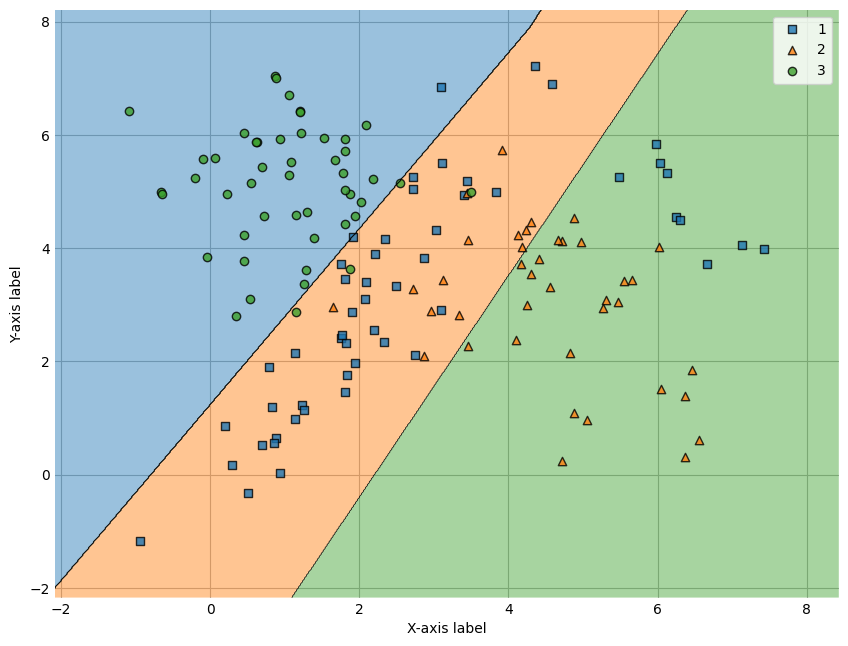

In [11]:
plot_func(X_train, y_train, linear_classifier)

From the diagram above, we notice that the classifier has managed to classify most of our training elements into the correct class, while the classes that have the wrong representations are located in the areas near the decision vectors. Furthermore, we notice that the classifier has managed to define the correct decision vectors.

We call the plot_func function on our testing data and plot our graph.

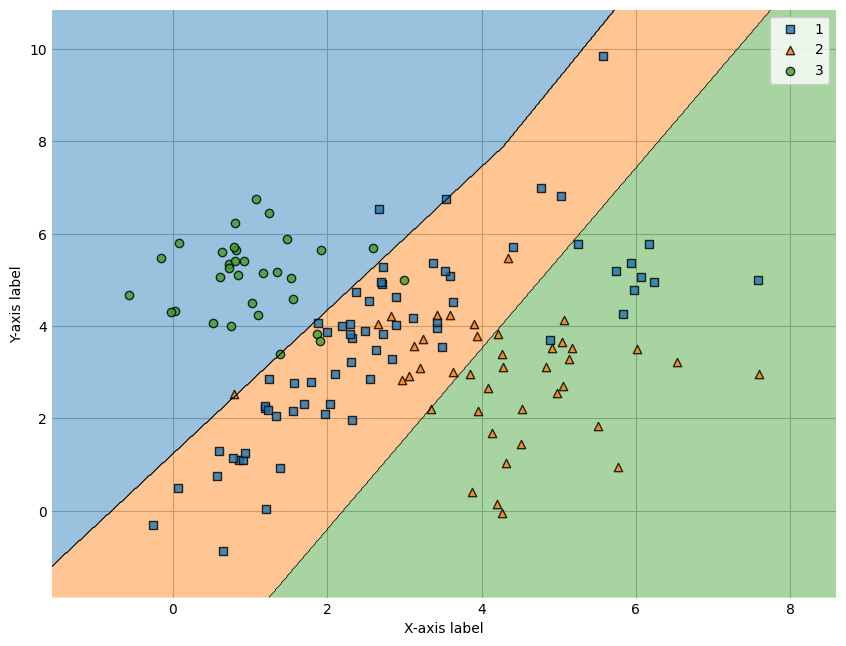

In [12]:
plot_func(X_test, y_test, linear_classifier)

Add commentary

## SVM Classifier with RBF kernel  

After we have already loaded our data we start to define the various values of the hyperparameters C (cost parameter that adjusts the trade-off between the accuracy in the data and the simplicity of the model) and gamma (kernel density parameter) that we want to experiment with. We choose the values [0.001, 0.01, 0.1, 1, 10, 100, 1000 ] that we think help to get a good picture of our classifier. We save our data in a new text file.

In [13]:
C = {0.001, 0.01, 0.1, 1, 10, 100, 1000}
gamma = {0.001, 0.01, 0.1, 1, 10, 100}

We define the train_and_evaluate_classifier function which is responsible for training and evaluating our classifier in a similar way as we did previously in the linear classifier.

In [14]:
def train_and_evaluate_classifier(clf, train_images, train_labels, test_images, test_labels, i, gamma):
    print(f'{clf.__class__.__name__} Linear Classification results for C = {i} and gamma = {gamma}')
    
    # Training
    clf.fit(train_images, train_labels)

    # Prediction on training images
    train_images_prediction = clf.predict(train_images)
        
    # Calculate classification errors for each data point
    classification_errors = (train_images_prediction != train_labels).astype(int)

    # Calculate the average error
    average_error = classification_errors.mean()
    print(f'The average error on the training set is: {average_error}')

    testing_images_prediction = clf.predict(test_images)

    # Calculate classification errors for each data point
    classification_errors = (testing_images_prediction != test_labels).astype(int)

    # Calculate the average error
    average_error = classification_errors.mean()
    print(f'The average error on the testing data set is: {average_error}')  


We then call our classifier for the various values of C and gamma and we save our results in the test file we have created.

In [15]:
from sklearn.svm import SVC
import sys

# Redirect stdout to a file
output_file = "svm_results.txt"
with open(output_file, 'w') as f:
    sys.stdout = f  # Redirect stdout to the file

    for g in gamma:
        for i in C:
            classifier = SVC(kernel='rbf', C=i, gamma=g)
            train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, i, g)

    sys.stdout = sys.__stdout__  # Reset stdout to its original value

We extract our data into a txt file and open them in order to perform further investigation.

In [17]:
# Read data from the file
with open('svm_results.txt', 'r') as file:
    data = file.readlines()

# Initialize lists to store extracted data
C_values, gamma_values, average_training_error, average_testing_error  = [], [], [], []

# Extract data from each line
for line in data:
    if "SVC Linear Classification results" in line:
        # Extract C and gamma values
        C, gamma = map(float, line.split("for C = ")[1].split(" and gamma = ")[0:2])
        C_values.append(C)
        gamma_values.append(gamma)

    # Extract accuracy values
    if "The average error on the training set is:" in line:
        average_training_error.append(float(line.split(":")[1]))

    if "The average error on the testing data set is:" in line:
        average_testing_error.append(float(line.split(":")[1]))

We then convert our lists intto numpy arrays to help us better manipulate them and define a color map for discrete gamma values.

In [18]:
C_values = np.array(C_values)
gamma_values = np.array(gamma_values)
average_training_error = np.array(average_training_error)
average_testing_error = np.array(average_testing_error)

gamma_colors = {0.001: 'red', 0.01: 'green', 0.1: 'blue', 1: 'purple', 10: 'orange', 100: 'brown'}
# Get unique gamma values
unique_gamma_values = np.unique(gamma_values)

We created a Function to plot our SVM results. The function takes various parameters such as `unique_gamma_values`, `C_values`, `accuracy`, `gamma_colors`, `type`, and `string_type` to create informative plots. The plots illustrate the training data accuracy with respect to the regularization parameter (`C`) for different gamma values.

In [19]:
def ploting_func(unique_gamma_values, C_values, accuracy, gamma_colors, type, string_type):
# Plotting Training Data Accuracy
    plt.figure(figsize=(12, 6))
    for gamma in unique_gamma_values:
        # Filter data for each gamma value
        mask = (gamma_values == gamma)
        sorted_indices = np.argsort(C_values[mask])
        plt.plot(C_values[mask][sorted_indices], accuracy[mask][sorted_indices],
                'o-', label=f'{type} {string_type} (Gamma={gamma})', color=gamma_colors[gamma])

    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel(f'{string_type}')
    plt.xscale('log')  # Logarithmic scale for better visualization
    plt.title(f'SVM with rbf kernel Classification {type} {string_type}')
    plt.legend()
    plt.show()


We call the functions to depict the average training data error.

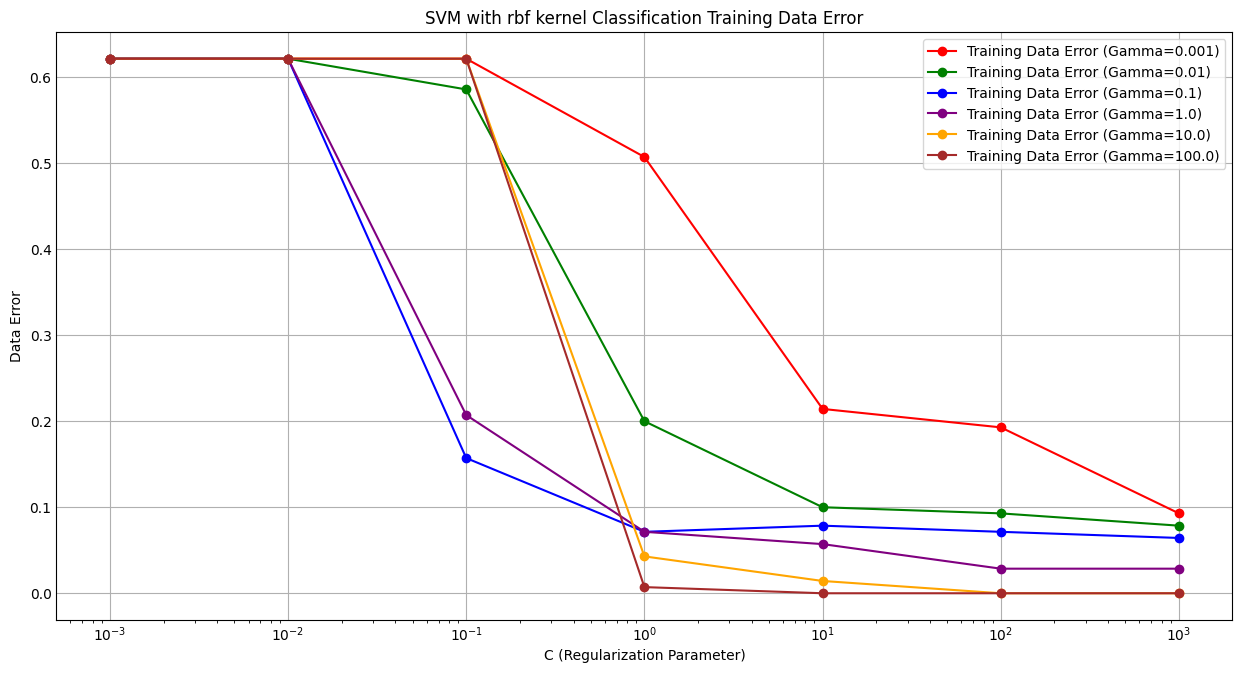

In [20]:
ploting_func(unique_gamma_values, C_values, average_training_error, gamma_colors, 'Training', 'Data Error')

Comment the graph.. 

We call the functions to depict the average testing data error.

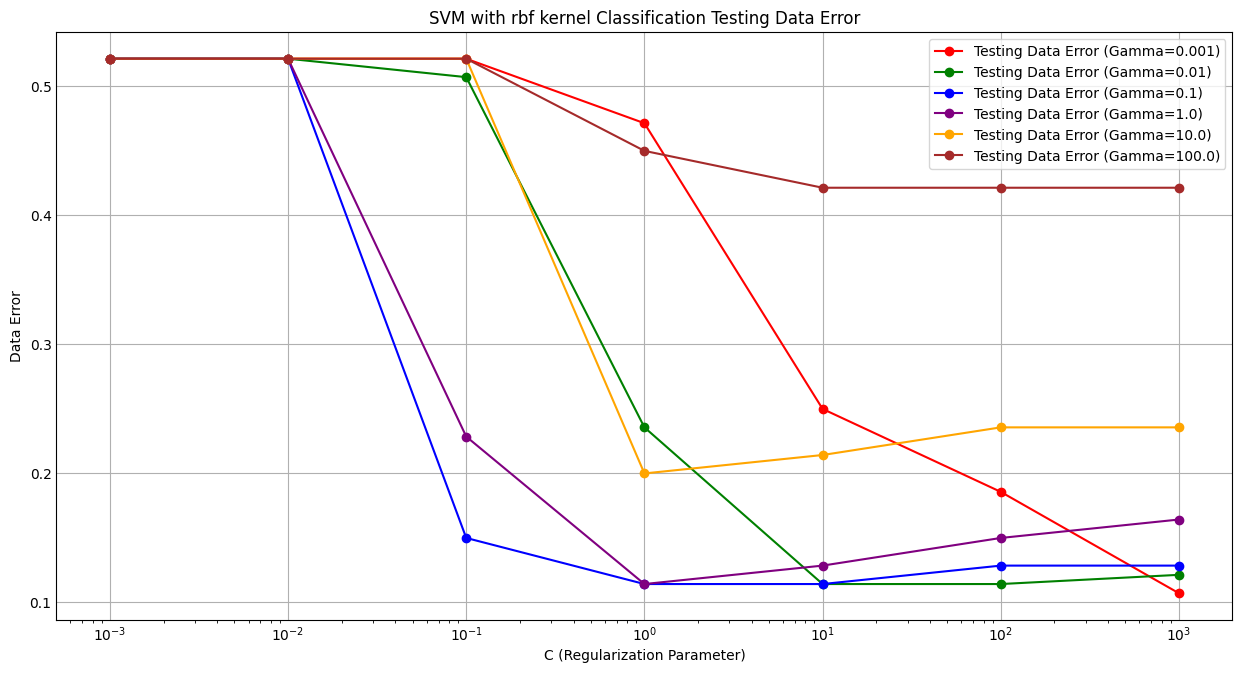

In [21]:
ploting_func(unique_gamma_values, C_values, average_testing_error, gamma_colors, 'Testing', 'Data Error')

Comment the graph..